In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import lib_data_load as ld
import lib_data_ref as dr
import seaborn as sns

start_year = 2020
end_year = 2020

dic_usagers = ld.load_usagers(start_year, end_year)
df_usagers = dic_usagers[2020]

## Merge data et suppression des colonnes inutiles

In [2]:
#  merge usagers and caracteristiques
df = df_usagers

# inutiles : ['id_vehicule', 'num_veh'] 
df = df.drop(columns=['id_vehicule', 'num_veh'])

## Encodages

In [3]:
# création de 4 classes basée sur les quartiles
# df['age'].describe()
def get_cl_age(age):
    if age <= 25:
        return '0-25'
    if 25 < age <= 37:
        return '26-37'
    if 37 < age <= 53:
        return '38-53'
    if 53 < age:
        return '>53'

df['gravité'] = df['grav'].apply(lambda i: dr.get_labels('grav', i))
df['age'] = 2022 - df['an_nais']
df["classe d'age"] = [get_cl_age(age) for age in df['age']]
df["catégorie d'utilisateur"] = df['catu'].apply(lambda i: dr.get_labels('catu', i))
df["sexe_lbl"] = df['sexe'].apply(lambda i: dr.get_labels('sexe', i))
df["trajet_lbl"] = df['trajet'].apply(lambda i: dr.get_labels('trajet', i))
df["secu1_lbl"] = df['secu1'].apply(lambda i: dr.get_labels('secu1', i))
df["secu2_lbl"] = df['secu2'].apply(lambda i: dr.get_labels('secu2', i))
df["secu3_lbl"] = df['secu3'].apply(lambda i: dr.get_labels('secu3', i))
df["locp_lbl"] = df['locp'].apply(lambda i: dr.get_labels('locp', i))
df["actp_lbl"] = df['actp'].apply(lambda i: dr.get_labels('actp', i))
df["etatp_lbl"] = df['etatp'].apply(lambda i: dr.get_labels('etatp', i))

df = df.drop(columns=['an_nais', 'age'], axis=1)

columns_titles = ['Tué', 'Blessé hospitalisé', 'Blessé léger', 'Indemne']

## Relation Gravité - Place (*place*)

gravité       Tué  Blessé hospitalisé  Blessé léger   Indemne
place                                                        
1        0.024818            0.148360      0.365188  0.461634
10       0.051559            0.290792      0.624773  0.032876
2        0.021822            0.158504      0.470098  0.349575
3        0.016667            0.088384      0.508586  0.386364
4        0.011192            0.099608      0.519866  0.369334
5        0.026769            0.124283      0.449331  0.399618
6        0.014706            0.139706      0.411765  0.433824
7        0.032025            0.181818      0.366736  0.419421
8        0.031390            0.156951      0.486547  0.325112
9        0.037572            0.187861      0.321773  0.452794


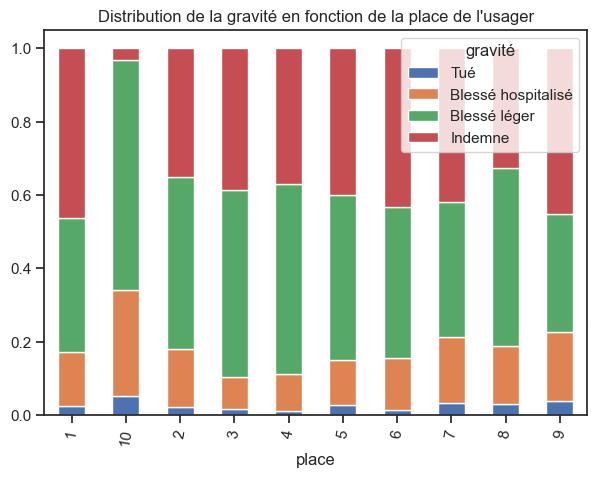

In [4]:
df_cross = pd.crosstab(df['place'], df['gravité'], normalize='index')
df_cross = df_cross.reindex(columns=columns_titles)
print(df_cross)

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
chart = df_cross.plot(kind="bar", stacked=True, rot=0, ax=ax, 
                         title="Distribution de la gravité en fonction de la place de l'usager")
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
sns.move_legend(ax, "upper right")

## Relation Gravité - Catégorie d'utilisateur (*catu*)

gravité                       Tué  Blessé hospitalisé  Blessé léger   Indemne
catégorie d'utilisateur                                                      
Conducteur               0.024842            0.148338      0.365164  0.461656
Passager                 0.021876            0.147359      0.464908  0.365856
Piéton                   0.051559            0.290792      0.624773  0.032876


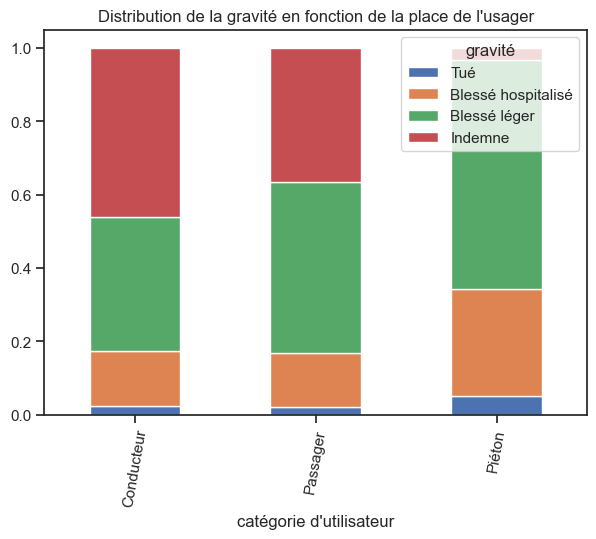

In [5]:
df_cross = pd.crosstab(df["catégorie d'utilisateur"], df['gravité'], normalize='index')
df_cross = df_cross.reindex(columns=columns_titles)
print(df_cross)

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
chart = df_cross.plot(kind="bar", stacked=True, rot=0, ax=ax, 
                         title="Distribution de la gravité en fonction de la place de l'usager")
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
sns.move_legend(ax, "upper right")

## Relation gravité - sexe (*sexe*)

gravité        Tué  Blessé hospitalisé  Blessé léger   Indemne
sexe_lbl                                                      
Féminin   0.018028            0.142218      0.472120  0.367634
Masculin  0.030197            0.167062      0.372216  0.430525


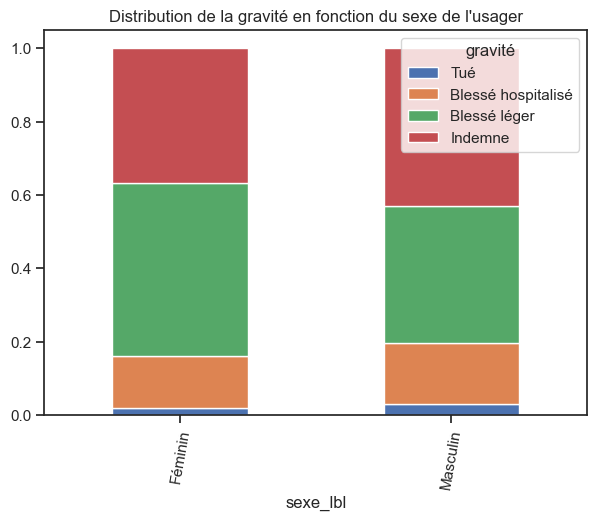

In [6]:
df_cross = pd.crosstab(df["sexe_lbl"], df['gravité'], normalize='index')
df_cross = df_cross.reindex(columns=columns_titles)
print(df_cross)

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
chart = df_cross.plot(kind="bar", stacked=True, rot=0, ax=ax, 
                         title="Distribution de la gravité en fonction du sexe de l'usager")
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
sns.move_legend(ax, "upper right")

## Relation Gravité - Age ( f(*an_nais*) )

gravité            Tué  Blessé hospitalisé  Blessé léger   Indemne
classe d'age                                                      
0-25          0.021687            0.174710      0.476136  0.327467
26-37         0.020898            0.134482      0.418002  0.426618
38-53         0.020397            0.132010      0.381647  0.465946
>53           0.042747            0.196222      0.335742  0.425289


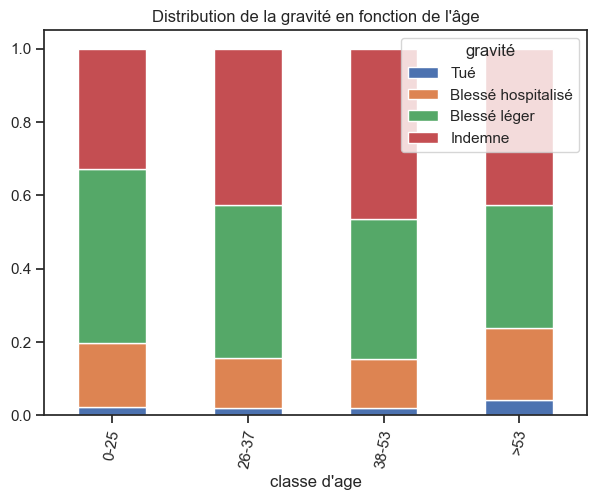

In [7]:
df_cross = pd.crosstab(df["classe d'age"], df['gravité'], normalize='index')
df_cross = df_cross.reindex(columns=columns_titles)
print(df_cross)

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
chart = df_cross.plot(kind="bar", stacked=True, rot=0, ax=ax, title="Distribution de la gravité en fonction de l'âge")
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
sns.move_legend(ax, "upper right")

## Relation gravité - motif du déplacement (*trajet*)

gravité                           Tué  Blessé hospitalisé  Blessé léger  \
trajet_lbl                                                                
Autre                        0.022290            0.124657      0.454574   
Courses - achats             0.034078            0.210811      0.317274   
Domicile - travail           0.019405            0.140391      0.431876   
Domicile - école             0.013848            0.161721      0.535114   
Non renseigné                0.022357            0.137835      0.441794   
Promende - loisirs           0.036928            0.208535      0.386697   
Utilisation professionnelle  0.010027            0.065173      0.282280   

gravité                       Indemne  
trajet_lbl                             
Autre                        0.398479  
Courses - achats             0.437838  
Domicile - travail           0.408328  
Domicile - école             0.289318  
Non renseigné                0.398014  
Promende - loisirs           0.367841  
Util

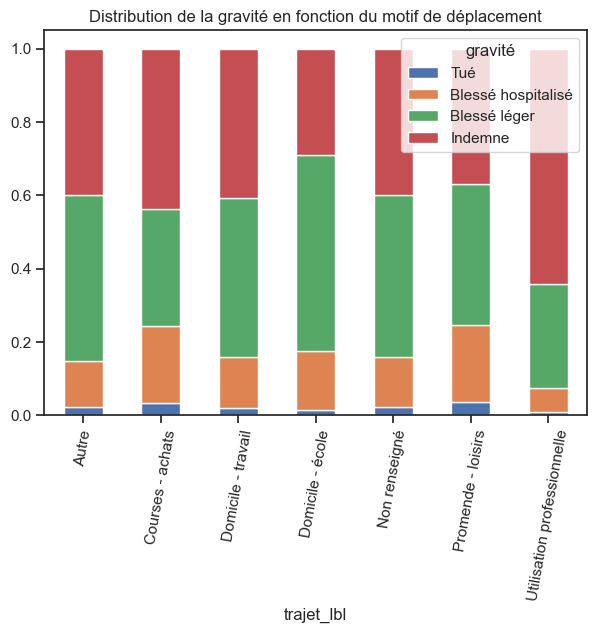

In [8]:
df_cross = pd.crosstab(df["trajet_lbl"], df['gravité'], normalize='index')
df_cross = df_cross.reindex(columns=columns_titles)
print(df_cross)

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
chart = df_cross.plot(kind="bar", stacked=True, rot=0, ax=ax, title="Distribution de la gravité en fonction du motif de déplacement")
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
sns.move_legend(ax, "upper right")

## Relation gravité - équipement de sécurité

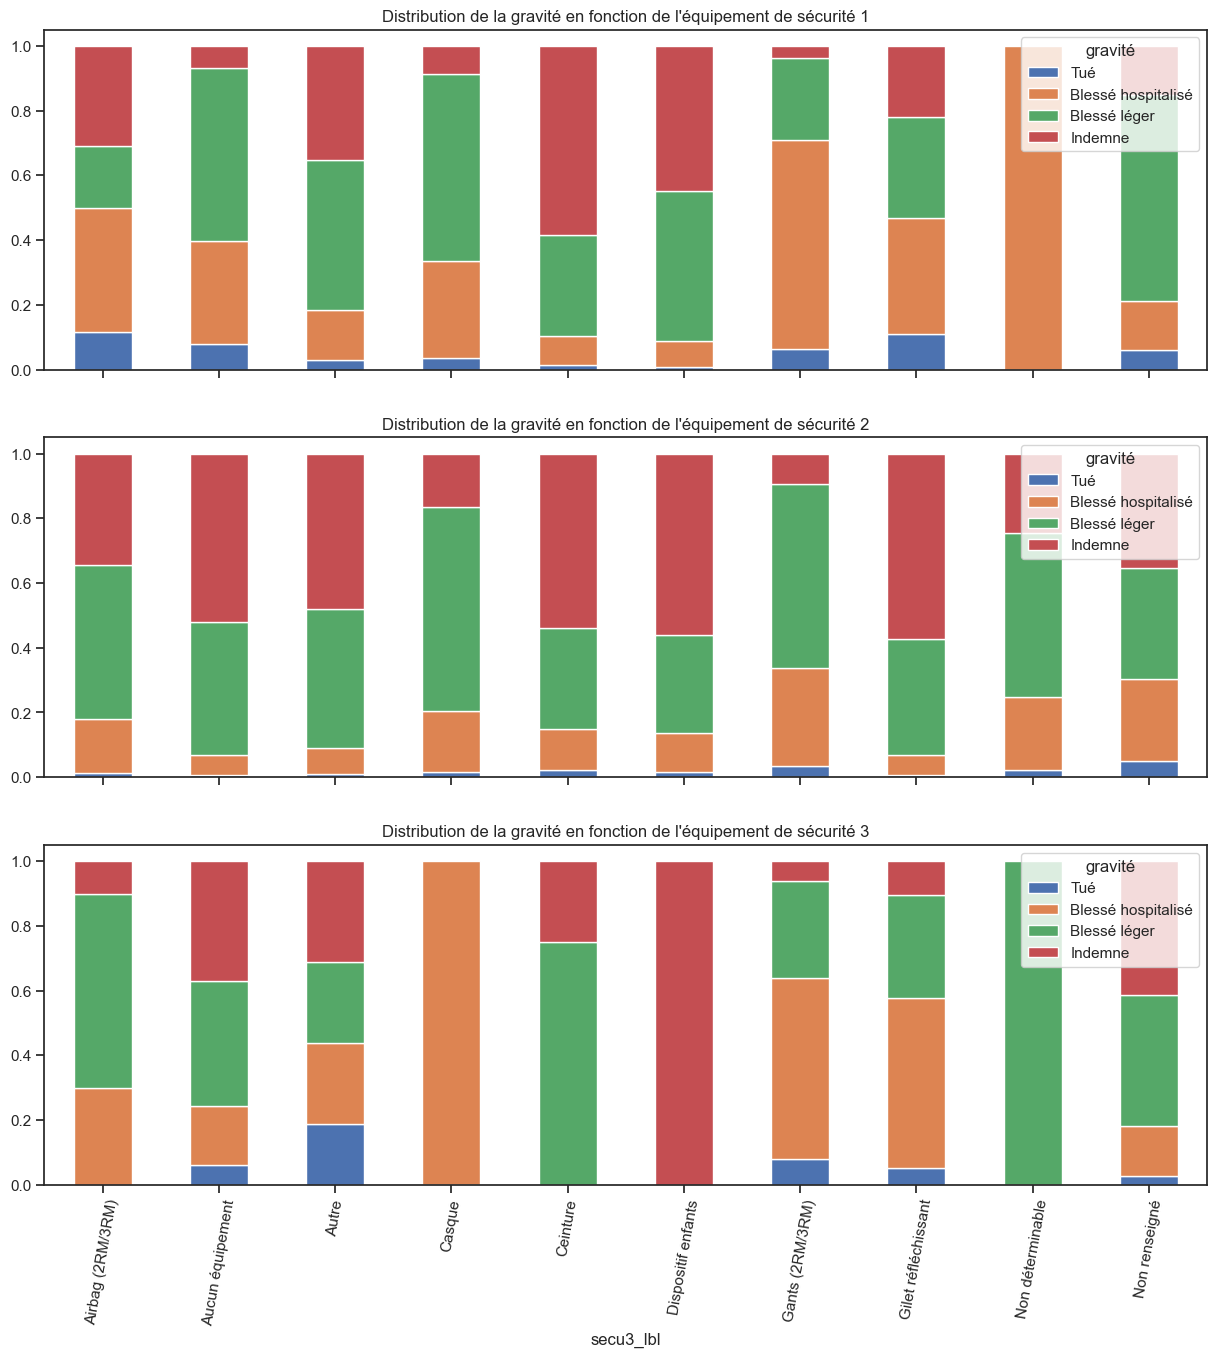

In [9]:
df_cross1 = pd.crosstab(df["secu1_lbl"], df['gravité'], normalize='index')
df_cross1 = df_cross1.reindex(columns=columns_titles)
# print(df_cross1)
df_cross2 = pd.crosstab(df["secu2_lbl"], df['gravité'], normalize='index')
df_cross2 = df_cross2.reindex(columns=columns_titles)
# print(df_cross2)
df_cross3 = pd.crosstab(df["secu3_lbl"], df['gravité'], normalize='index')
df_cross3 = df_cross3.reindex(columns=columns_titles)
# print(df_cross3)


sns.set_theme(style="ticks")
f, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True)
f.set_size_inches(15, 15)

chart = df_cross1.plot(kind="bar", stacked=True, rot=0, ax=ax1, title="Distribution de la gravité en fonction de l'équipement de sécurité 1")
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
sns.move_legend(ax1, "upper right")

chart = df_cross2.plot(kind="bar", stacked=True, rot=0, ax=ax2, title="Distribution de la gravité en fonction de l'équipement de sécurité 2")
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
sns.move_legend(ax2, "upper right")

chart = df_cross3.plot(kind="bar", stacked=True, rot=0, ax=ax3, title="Distribution de la gravité en fonction de l'équipement de sécurité 3")
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
sns.move_legend(ax3, "upper right")


## Relation gravité - localisation du piéton (*locp*)

gravité                                              Tué  Blessé hospitalisé  \
locp_lbl                                                                       
Inconnue                                        0.076316            0.273684   
Sans objet                                      0.041159            0.223405   
Sur accotement                                  0.179039            0.362445   
Sur chaussée - A +50 du pass piéton             0.115930            0.364470   
Sur chaussée - A -50 du pass piéton             0.042716            0.286418   
Sur contre allée                                0.060000            0.300000   
Sur pass piéton - Avec signalisation lumineuse  0.023387            0.212903   
Sur pass piéton - Sans signalisation lumineuse  0.029857            0.305112   
Sur refuge ou BAU                               0.000000            0.000000   
Sur trottoir                                    0.033439            0.272293   

gravité                                

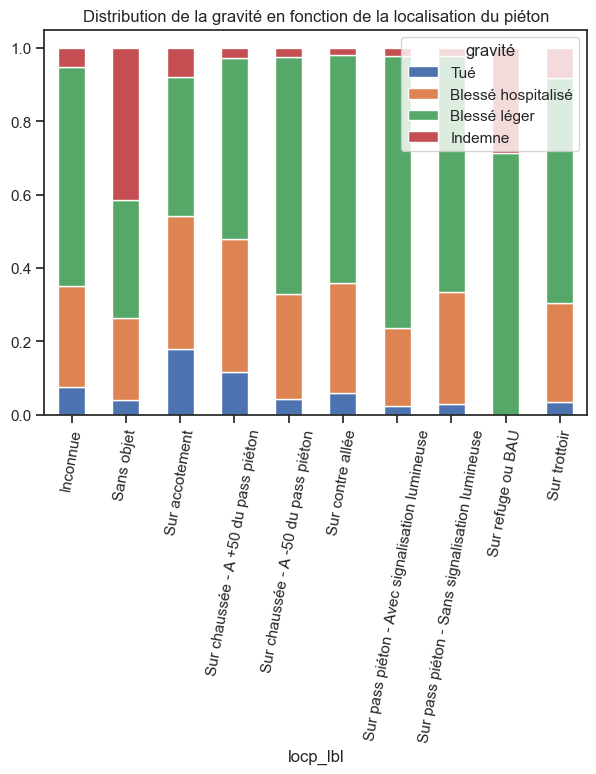

In [10]:
df_cross = pd.crosstab(df["locp_lbl"], df['gravité'], normalize='index')
df_cross = df_cross.reindex(columns=columns_titles)
print(df_cross)

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
chart = df_cross.plot(kind="bar", stacked=True, rot=0, ax=ax, title="Distribution de la gravité en fonction de la localisation du piéton")
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
sns.move_legend(ax, "upper right")

## Relation gravité - action du piéton (*actp*)

gravité                                          Tué  Blessé hospitalisé  \
actp_lbl                                                                   
Autre                                       0.081818            0.309091   
Avec animal                                 0.071429            0.500000   
Inconnue                                    0.156250            0.273438   
Jouant - courant                            0.013514            0.263514   
Masqué                                      0.039062            0.257812   
Monte/descend du véhicule                   0.103093            0.257732   
Se déplaçant - Non renseigné ou sans objet  0.038359            0.210204   
Se déplaçant - Sens inverse du véhicule     0.075397            0.353175   
Se déplaçant - Sens véhicule ou heurtant    0.112811            0.311663   
Traversant                                  0.039487            0.287546   

gravité                                     Blessé léger   Indemne  
actp_lbl          

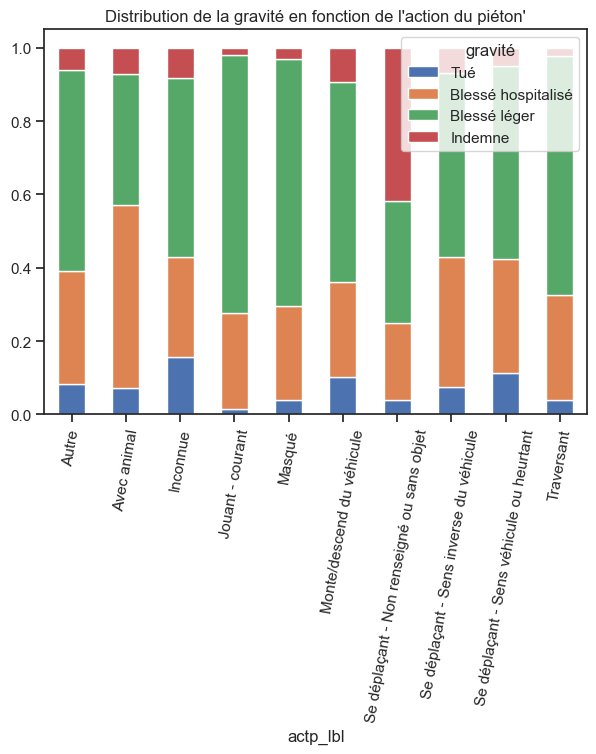

In [11]:
df_cross = pd.crosstab(df["actp_lbl"], df['gravité'], normalize='index')
df_cross = df_cross.reindex(columns=columns_titles)
print(df_cross)

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
chart = df_cross.plot(kind="bar", stacked=True, rot=0, ax=ax, title="Distribution de la gravité en fonction de l'action du piéton'")
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
sns.move_legend(ax, "upper right")

## Relation gravité - Piéton seul ou non (*etatp*)

gravité          Tué  Blessé hospitalisé  Blessé léger   Indemne
etatp_lbl                                                       
Accompagné  0.034527            0.260870      0.618926  0.085678
En groupe   0.038462            0.234615      0.642308  0.084615
Seul        0.056928            0.301956      0.626523  0.014593


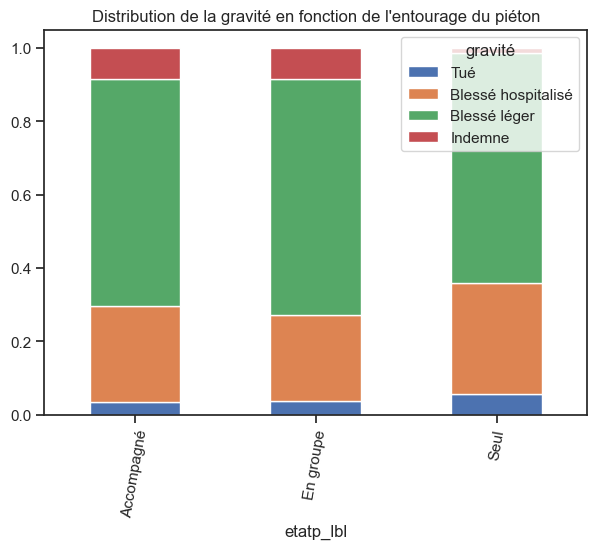

In [12]:
df_cross = pd.crosstab(df["etatp_lbl"], df['gravité'], normalize='index')
df_cross = df_cross.reindex(columns=columns_titles)
print(df_cross)

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
chart = df_cross.plot(kind="bar", stacked=True, rot=0, ax=ax, title="Distribution de la gravité en fonction de l'entourage du piéton")
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
sns.move_legend(ax, "upper right")